In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [6]:
# Caminho para o diretório de dados
data_dir = os.path.join('..', 'test')

In [7]:
# Definir geradores de dados com e sem data augmentation
datagen_no_aug = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)
datagen_aug = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [8]:
# Carregar dados de treino e validação (sem data augmentation)
train_generator_no_aug = datagen_no_aug.flow_from_directory(
    data_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

validation_generator_no_aug = datagen_no_aug.flow_from_directory(
    data_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [9]:
# Carregar dados de treino e validação (com data augmentation)
train_generator_aug = datagen_aug.flow_from_directory(
    data_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

validation_generator_aug = datagen_no_aug.flow_from_directory(
    data_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [10]:
#criacao do modelo

def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model


In [11]:
# Treinamento sem data augmentation
model_s_no_aug = create_model()
model_s_no_aug.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

history_no_aug = model_s_no_aug.fit(
    train_generator_no_aug,
    epochs=10,
    validation_data=validation_generator_no_aug
)




Epoch 1/10


250/250 [==============================] - 58s 228ms/step - loss: 1.9878 - accuracy: 0.2630 - val_loss: 1.7859 - val_accuracy: 0.3480
Epoch 2/10
250/250 [==============================] - 3s 11ms/step - loss: 1.6113 - accuracy: 0.4190 - val_loss: 1.5642 - val_accuracy: 0.4110
Epoch 3/10
250/250 [==============================] - 3s 11ms/step - loss: 1.4279 - accuracy: 0.4854 - val_loss: 1.5729 - val_accuracy: 0.4285
Epoch 4/10
250/250 [==============================] - 3s 11ms/step - loss: 1.3178 - accuracy: 0.5185 - val_loss: 1.4162 - val_accuracy: 0.4965
Epoch 5/10
250/250 [==============================] - 3s 12ms/step - loss: 1.2581 - accuracy: 0.5516 - val_loss: 1.4137 - val_accuracy: 0.5085
Epoch 6/10
250/250 [==============================] - 3s 11ms/step - loss: 1.1642 - accuracy: 0.5854 - val_loss: 1.4127 - val_accuracy: 0.5010
Epoch 7/10
250/250 [==============================] - 3s 11ms/step - loss: 1.0893 - accuracy: 0.6129 - val_loss: 1.3308 - val_accuracy:

In [12]:
# Treinamento com data augmentation
model_s_aug = create_model()
model_s_aug.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

history_aug = model_s_aug.fit(
    train_generator_aug,
    epochs=10,
    validation_data=validation_generator_aug
)

Epoch 1/10
250/250 [==============================] - 5s 19ms/step - loss: 2.0630 - accuracy: 0.2319 - val_loss: 1.8470 - val_accuracy: 0.3185
Epoch 2/10
250/250 [==============================] - 5s 19ms/step - loss: 1.8375 - accuracy: 0.3171 - val_loss: 1.7582 - val_accuracy: 0.3545
Epoch 3/10
250/250 [==============================] - 5s 19ms/step - loss: 1.7198 - accuracy: 0.3681 - val_loss: 1.6128 - val_accuracy: 0.3905
Epoch 4/10
250/250 [==============================] - 5s 19ms/step - loss: 1.6545 - accuracy: 0.3935 - val_loss: 1.6910 - val_accuracy: 0.3755
Epoch 5/10
250/250 [==============================] - 5s 19ms/step - loss: 1.5982 - accuracy: 0.4126 - val_loss: 1.5452 - val_accuracy: 0.4210
Epoch 6/10
250/250 [==============================] - 5s 19ms/step - loss: 1.5762 - accuracy: 0.4263 - val_loss: 1.4962 - val_accuracy: 0.4435
Epoch 7/10
250/250 [==============================] - 5s 19ms/step - loss: 1.5347 - accuracy: 0.4365 - val_loss: 1.5194 - val_accuracy: 0.4440

In [13]:
# Avaliar o modelo sem data augmentation
test_loss_no_aug, test_acc_no_aug = model_s_no_aug.evaluate(validation_generator_no_aug, verbose=2)
print(f'Test accuracy without data augmentation: {test_acc_no_aug}')

63/63 - 1s - loss: 1.3466 - accuracy: 0.5465 - 522ms/epoch - 8ms/step
Test accuracy without data augmentation: 0.546500027179718


In [14]:
# Avaliar o modelo com data augmentation
test_loss_aug, test_acc_aug = model_s_aug.evaluate(validation_generator_aug, verbose=2)
print(f'Test accuracy with data augmentation: {test_acc_aug}')

63/63 - 1s - loss: 1.4504 - accuracy: 0.4810 - 509ms/epoch - 8ms/step
Test accuracy with data augmentation: 0.48100000619888306


In [15]:
# Função para plotar gráficos de acurácia e perda
def plot_history(histories, titles):
    for i, history in enumerate(histories):
        plt.figure(figsize=(12, 4))
        # Acurácia
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Treinamento')
        plt.plot(history.history['val_accuracy'], label='Validação')
        plt.title(f'Acurácia - {titles[i]}')
        plt.xlabel('Época')
        plt.ylabel('Acurácia')
        plt.legend()

        # Perda
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Treinamento')
        plt.plot(history.history['val_loss'], label='Validação')
        plt.title(f'Perda - {titles[i]}')
        plt.xlabel('Época')
        plt.ylabel('Perda')
        plt.legend()

        plt.show()

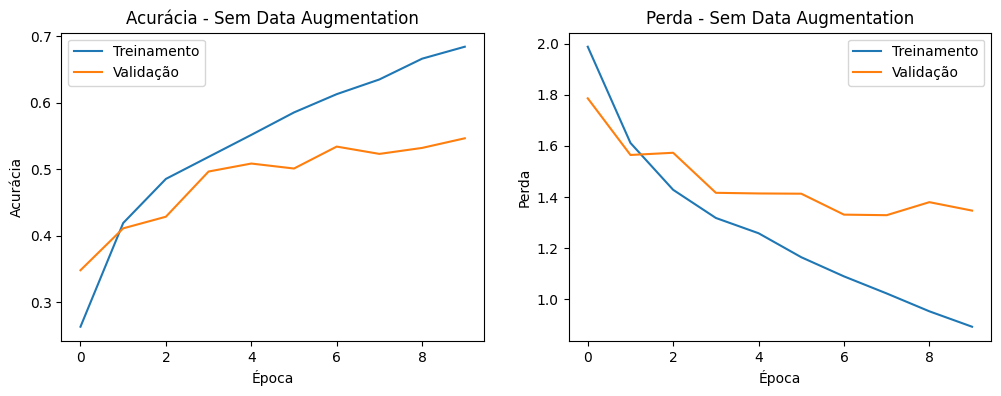

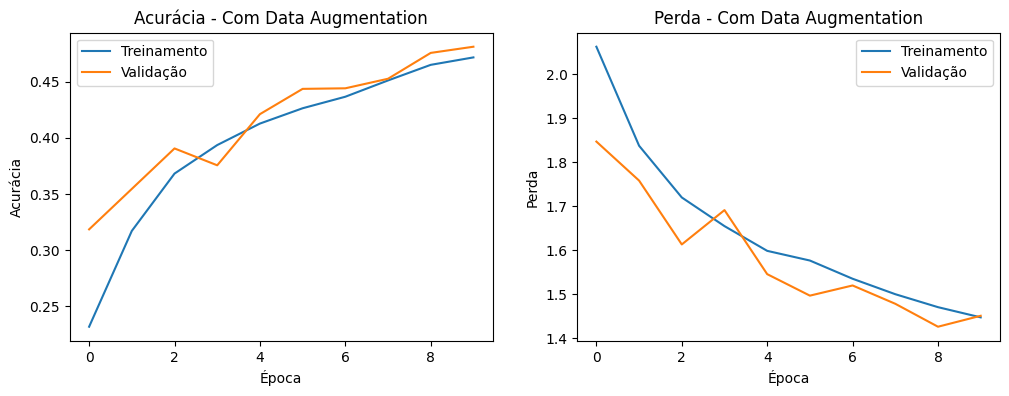

In [16]:
# Plotar os gráficos
plot_history([history_no_aug, history_aug], ['Sem Data Augmentation', 'Com Data Augmentation'])

In [17]:
# Salvar o modelo
model_s_no_aug.save('model_no_aug.h5')
model_s_aug.save('model_s_aug.h5')

c:\Users\João\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
